# **Import** **Library**

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import keras_tuner as kt

# **Collect Dataset**

In [4]:
# Collect Train Dataset
file_list = ["25_3-1_part_2.csv", "25_5-1_part_1.csv", "25_5-1_part_2.csv", "25_8-7_part_1.csv","25_9-1_part_1.csv","25_9-1_part_2.csv","29_3-1_part_1.csv","29_3-1_part_2.csv","30_3-3_part_1.csv","30_3-3_part_2.csv","16_2-6_part_2.csv",
             "16_2-7_part_1.csv","16_2-7_part_2.csv","16_2-16_part_1.csv","16_2-16_part_2.csv","16_4-1_part_1.csv","16_4-1_part_2.csv",'16_7-6_part_1.csv','16_8-1_part_2.csv','16_10-1_part_1.csv','16_10-1_part_2.csv',
             '17_4-1_part_1.csv','17_11-1_part_1.csv','17_11-1_part_2.csv','25_2-7_part_1.csv',"25_3-1_part_1.csv","15_9-13_part_1.csv","15_9-13_part_2.csv","15_9-17_part_1.csv","15_9-17_part_2.csv","16_1-2_part_2.csv"]

# Combined Train dataset
df_list = [pd.read_csv(file) for file in file_list]
df_combined = pd.concat(df_list, ignore_index=True)

df_combined.head()


,file_name,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,25_3-1_part_2,NaN,30000.0,NaN,12.250001,3.756463,NaN,2.780542,NaN,3.861288,...,NaN,2.098649,NaN,NaN,487281.09375,14.885397,NaN,-2010.945679,39.450001,2033.112
1,25_3-1_part_2,NaN,30000.0,NaN,12.250001,3.657893,NaN,2.966370,NaN,3.861136,...,NaN,2.104864,NaN,NaN,487281.09375,15.292228,NaN,-2011.097534,38.028023,2033.264
2,25_3-1_part_2,NaN,30000.0,NaN,12.250001,3.661492,NaN,2.578174,NaN,3.860884,...,NaN,2.115363,NaN,NaN,487281.09375,14.899456,NaN,-2011.249512,37.983978,2033.416
3,25_3-1_part_2,NaN,30000.0,NaN,12.250001,3.702025,NaN,2.229347,NaN,3.860664,...,NaN,2.127243,NaN,NaN,487281.09375,14.540090,NaN,-2011.401611,38.629597,2033.568
4,25_3-1_part_2,NaN,30000.0,NaN,12.250001,3.741770,NaN,2.263741,NaN,3.860460,...,NaN,2.134983,NaN,NaN,487281.09375,14.437060,NaN,-2011.553467,3399.725028,2033.720


In [5]:
# Collect Test Dataset
df_test = pd.read_csv("test_dataset.csv")
df_test

,uuid,file_name,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,14812,25_10-10,53.066914,12.250001,3.125396,NaN,0.051304,NaN,45.224689,NaN,...,NaN,2.131319,0.398266,NaN,459853.34375,12.301304,0.985707,-1308.193359,1.019758,1348.310400
1,72908,25_10-10,53.109482,12.250001,3.292384,NaN,0.049227,NaN,49.948738,NaN,...,NaN,2.129777,0.389460,NaN,459853.34375,12.299226,0.888855,-1308.345337,0.924186,1348.462400
2,103104,25_10-10,53.152004,12.250001,3.693287,NaN,0.047644,NaN,52.813866,NaN,...,NaN,2.138082,0.394868,NaN,459853.34375,12.297644,0.870774,-1308.497314,0.895908,1348.614400
3,23480,25_10-10,53.194557,12.250001,4.051715,NaN,0.026056,NaN,58.635353,NaN,...,NaN,2.153999,0.389355,NaN,459853.34375,12.276056,0.913030,-1308.649292,0.955895,1348.766400
4,104267,25_10-10,53.237164,12.250001,4.299806,NaN,0.049645,NaN,58.242565,NaN,...,NaN,2.140920,0.365808,NaN,459853.34375,12.299644,0.959649,-1308.801392,1.022451,1348.918400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121792,10928,34_3-3 A,12.779722,8.500000,8.879548,NaN,NaN,NaN,15.756256,NaN,...,NaN,2.515146,NaN,NaN,NaN,8.647468,NaN,NaN,NaN,5006.809976
121793,26727,34_3-3 A,11.651907,8.500000,10.237462,NaN,NaN,NaN,15.760216,NaN,...,NaN,2.543073,NaN,NaN,NaN,8.636636,NaN,NaN,NaN,5006.961976
121794,83995,34_3-3 A,11.266949,8.500000,10.901587,NaN,NaN,NaN,15.990236,NaN,...,NaN,2.576337,NaN,NaN,NaN,8.592650,NaN,NaN,NaN,5007.113976
121795,67375,34_3-3 A,11.116782,8.500000,10.468700,NaN,NaN,NaN,15.314774,NaN,...,NaN,2.606787,NaN,NaN,NaN,8.546233,NaN,NaN,NaN,5007.265976


# **EDA**

In [6]:
# Training Dataframe columns
df_combined.columns

Index(['file_name', 'filename', 'Lithology_code', 'ROPA', 'BS', 'PEF', 'RXO',
       'DCAL', 'RMIC', 'ROP', 'SP', 'RMED', 'GR', 'DTC', 'MUDWEIGHT', 'Y_LOC',
       'DRHO', 'DEPTH_MD', 'DTS', 'RHOB', 'NPHI', 'SGR', 'X_LOC', 'CALI',
       'RSHA', 'Z_LOC', 'RDEP', 'DEPT'],
      dtype='object')

In [7]:
# Testing Dataframe columns
df_test.columns

Index(['uuid', 'file_name', 'ROPA', 'BS', 'PEF', 'RXO', 'DCAL', 'RMIC', 'ROP',
       'SP', 'RMED', 'GR', 'DTC', 'MUDWEIGHT', 'Y_LOC', 'DRHO', 'DEPTH_MD',
       'DTS', 'RHOB', 'NPHI', 'SGR', 'X_LOC', 'CALI', 'RSHA', 'Z_LOC', 'RDEP',
       'DEPT'],
      dtype='object')

In [8]:
# Training Dataframe Shape
df_combined.shape

(304281, 28)

In [9]:
# Testing Dataframe Shape
df_test.shape

(121797, 27)

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304281 entries, 0 to 304280
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_name       304281 non-null  object 
 1   filename        0 non-null       float64
 2   Lithology_code  250400 non-null  float64
 3   ROPA            22080 non-null   float64
 4   BS              139658 non-null  float64
 5   PEF             149459 non-null  float64
 6   RXO             68113 non-null   float64
 7   DCAL            70483 non-null   float64
 8   RMIC            28540 non-null   float64
 9   ROP             244397 non-null  float64
 10  SP              216257 non-null  float64
 11  RMED            277705 non-null  float64
 12  GR              300436 non-null  float64
 13  DTC             265035 non-null  object 
 14  MUDWEIGHT       174382 non-null  float64
 15  Y_LOC           296738 non-null  float64
 16  DRHO            211943 non-null  float64
 17  DEPTH_MD  

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121797 entries, 0 to 121796
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       121797 non-null  int64  
 1   file_name  121797 non-null  object 
 2   ROPA       30066 non-null   float64
 3   BS         89910 non-null   float64
 4   PEF        86459 non-null   float64
 5   RXO        6707 non-null    float64
 6   DCAL       41164 non-null   float64
 7   RMIC       14930 non-null   float64
 8   ROP        87913 non-null   float64
 9   SP         75533 non-null   float64
 10  RMED       107922 non-null  float64
 11  GR         121794 non-null  float64
 12  DTC        120938 non-null  float64
 13  MUDWEIGHT  33364 non-null   float64
 14  Y_LOC      114368 non-null  float64
 15  DRHO       95297 non-null   float64
 16  DEPTH_MD   114368 non-null  float64
 17  DTS        25344 non-null   float64
 18  RHOB       96178 non-null   float64
 19  NPHI       78221 non-nu

In [12]:
df_combined.describe()

,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
count,0.0,250400.000000,22080.000000,139658.000000,149459.000000,68113.000000,70483.000000,28540.000000,244397.000000,216257.000000,...,13513.000000,210887.000000,137409.000000,17418.000000,296738.000000,241363.000000,135011.000000,296738.000000,300436.000000,304281.000000
mean,NaN,60923.148946,22.098711,13.833663,5.111277,13.671918,9.203146,3.183852,34.664516,68.026638,...,206.414771,2.205935,0.341284,59.359528,470061.878398,14.210724,23.693302,-1651.504857,360.453026,1643.962409
std,NaN,15442.366576,12.704032,4.535370,7.111814,303.791556,288.957821,61.781591,65.542362,55.368917,...,84.297315,0.264204,0.147417,27.999848,25594.383515,3.772850,162.820059,918.228148,913.832840,934.166382
min,NaN,30000.000000,0.472762,8.500000,0.351116,0.100000,-8.475032,0.132760,0.000000,-289.547302,...,90.316788,1.165622,-0.021500,-196.869995,437592.906250,5.519500,0.005141,-4440.093262,0.109100,25.000000
25%,NaN,65000.000000,12.703808,12.250001,2.897513,0.767282,0.074143,0.742398,4.500257,37.044769,...,143.192856,2.031391,0.229191,41.139948,443865.500000,12.259444,0.717435,-2280.409180,40.253189,893.072000
50%,NaN,65000.000000,19.580767,12.250001,3.773315,1.249617,0.432192,1.226077,18.022886,57.758904,...,181.163834,2.155141,0.355896,62.971619,475885.281250,13.316927,1.075544,-1580.366150,62.013117,1576.202799
75%,NaN,65000.000000,29.362420,17.500000,5.132616,2.867546,1.224148,2.006616,37.920708,92.356598,...,252.949524,2.426537,0.468907,73.983374,487274.843750,17.541880,1.828911,-916.844543,89.513861,2286.641016
max,NaN,99000.000000,92.480003,36.000000,318.368317,35930.671875,10012.417969,6567.910156,2224.647461,280.842529,...,448.659058,3.266250,0.901139,152.516830,520153.187500,27.344881,1999.800049,-73.719467,5107.217703,4466.586001


In [13]:
df_test.describe()

,uuid,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
count,121797.000000,30066.000000,89910.000000,86459.000000,6707.000000,41164.000000,14930.000000,87913.000000,75533.000000,107922.000000,...,25344.000000,96178.000000,78221.000000,1139.000000,114368.000000,121790.000000,62370.000000,114368.000000,114368.000000,121797.000000
mean,60898.000000,28.830334,12.119027,6.991831,203.826026,0.412369,2.025824,19.926618,39.661061,3.940217,...,222.231116,2.354176,0.301119,70.299650,480192.169831,13.179384,18.101395,-2437.613324,25.548202,2525.550626
std,35159.909706,13.749029,2.594722,9.450820,560.431743,1.946604,7.149082,16.931424,60.964659,33.353406,...,89.262575,0.218729,0.118703,26.823914,19612.107336,2.967461,153.761471,888.468191,101.761343,964.329085
min,0.000000,1.151152,8.500000,0.649790,0.216556,-11.401788,0.063258,-0.117977,-108.971741,-0.008419,...,100.993469,1.239131,-0.023143,26.544502,443841.281250,3.018784,0.200000,-4279.811523,0.037163,682.913201
25%,30449.000000,19.163941,12.250001,3.840371,1.389883,0.052732,0.709954,7.875647,23.440899,0.861432,...,169.791275,2.198444,0.222991,58.093708,463392.625000,12.218078,0.717742,-3186.944275,0.851109,1808.017201
50%,60898.000000,26.588402,12.250001,4.897516,2.754916,0.239852,1.016838,15.123291,46.636482,1.431406,...,190.748611,2.389021,0.300946,66.158409,479849.015625,12.479803,1.072096,-2423.177491,1.512815,2442.617201
75%,91347.000000,36.199546,12.250001,6.642264,9.633133,0.698074,2.071700,27.953146,61.880592,2.296093,...,219.192905,2.527519,0.383077,77.908852,501131.843750,13.835276,2.518697,-1733.161621,2.415172,3241.031000
max,121796.000000,131.990906,26.000002,304.168213,2030.926148,16.338953,235.867477,337.189850,204.147598,1988.616333,...,562.037109,3.457820,0.893110,344.230591,515574.437500,25.026470,2193.904541,-655.904541,1999.877808,5007.417976


In [14]:
# Cek missing training dataset 
df_combined.isnull().sum()

file_name              0
filename          304281
Lithology_code     53881
ROPA              282201
BS                164623
PEF               154822
RXO               236168
DCAL              233798
RMIC              275741
ROP                59884
SP                 88024
RMED               26576
GR                  3845
DTC                39246
MUDWEIGHT         129899
Y_LOC               7543
DRHO               92338
DEPTH_MD            7543
DTS               290768
RHOB               93394
NPHI              166872
SGR               286863
X_LOC               7543
CALI               62918
RSHA              169270
Z_LOC               7543
RDEP                3845
DEPT                   0
dtype: int64

In [15]:
# Cek persen (%) training dataset missing
missing_percent = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percent)

file_name           0.000000
filename          100.000000
Lithology_code     17.707645
ROPA               92.743550
BS                 54.102294
PEF                50.881258
RXO                77.615099
DCAL               76.836214
RMIC               90.620512
ROP                19.680493
SP                 28.928523
RMED                8.734032
GR                  1.263635
DTC                12.897946
MUDWEIGHT          42.690474
Y_LOC               2.478959
DRHO               30.346292
DEPTH_MD            2.478959
DTS                95.559039
RHOB               30.693339
NPHI               54.841413
SGR                94.275686
X_LOC               2.478959
CALI               20.677597
RSHA               55.629500
Z_LOC               2.478959
RDEP                1.263635
DEPT                0.000000
dtype: float64


In [16]:
#Cek missing testing dataset 
df_test.isnull().sum()

uuid              0
file_name         0
ROPA          91731
BS            31887
PEF           35338
RXO          115090
DCAL          80633
RMIC         106867
ROP           33884
SP            46264
RMED          13875
GR                3
DTC             859
MUDWEIGHT     88433
Y_LOC          7429
DRHO          26500
DEPTH_MD       7429
DTS           96453
RHOB          25619
NPHI          43576
SGR          120658
X_LOC          7429
CALI              7
RSHA          59427
Z_LOC          7429
RDEP           7429
DEPT              0
dtype: int64

In [17]:
# Cek persen (%) testing dataset missing
missing_percent = (df_test.isnull().sum() / len(df_test)) * 100
print(missing_percent)

uuid          0.000000
file_name     0.000000
ROPA         75.314663
BS           26.180448
PEF          29.013851
RXO          94.493296
DCAL         66.202780
RMIC         87.741898
ROP          27.820061
SP           37.984515
RMED         11.391906
GR            0.002463
DTC           0.705272
MUDWEIGHT    72.606879
Y_LOC         6.099493
DRHO         21.757515
DEPTH_MD      6.099493
DTS          79.191606
RHOB         21.034180
NPHI         35.777564
SGR          99.064837
X_LOC         6.099493
CALI          0.005747
RSHA         48.791842
Z_LOC         6.099493
RDEP          6.099493
DEPT          0.000000
dtype: float64


In [18]:
# Cleaning Data for feature "DTC"
def clean_dtc(value):
    if isinstance(value, str):
        value = value.replace("val:", "").split("[")[0]
    try:
        return float(value)
    except:
        return None

df_combined['DTC'] = df_combined['DTC'].apply(clean_dtc)
df_combined['DTC'] = df_combined['DTC'].astype(float)


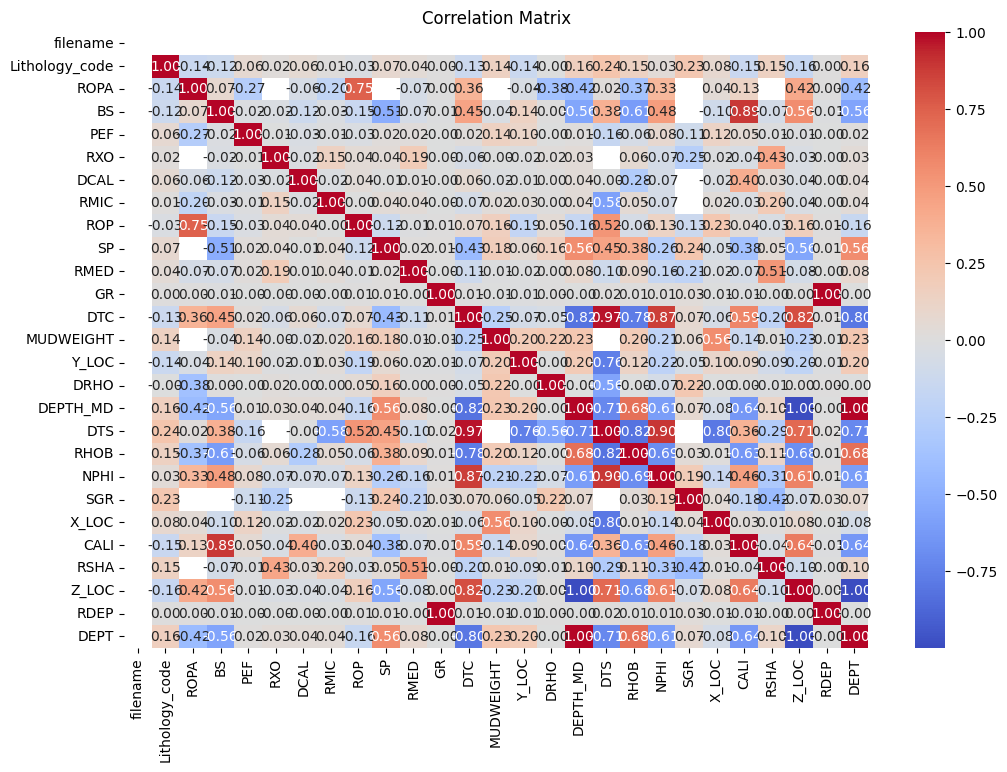

In [19]:
# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df_combined.select_dtypes(include=np.number).columns
df_combined_numeric = df_combined[numeric_features]

plt.figure(figsize=(12, 8))
sns.heatmap(df_combined_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [20]:
# Drop feature in Training dataset
df_combined.drop(columns=['filename', 'ROPA', 'BS', 'RXO',"DCAL","RMIC", "ROP",'DTS',"DEPTH_MD","RDEP","MUDWEIGHT"], inplace=True)

In [21]:
# Drop feature in Testing dataset
df_test.drop(columns=["file_name",'ROPA', 'BS', 'RXO',"DCAL","RMIC", "ROP","DTS","DEPTH_MD","RDEP","MUDWEIGHT"], inplace=True)

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_11836\1627404722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined.corr(), annot=True, cmap="coolwarm", fmt=".2f")


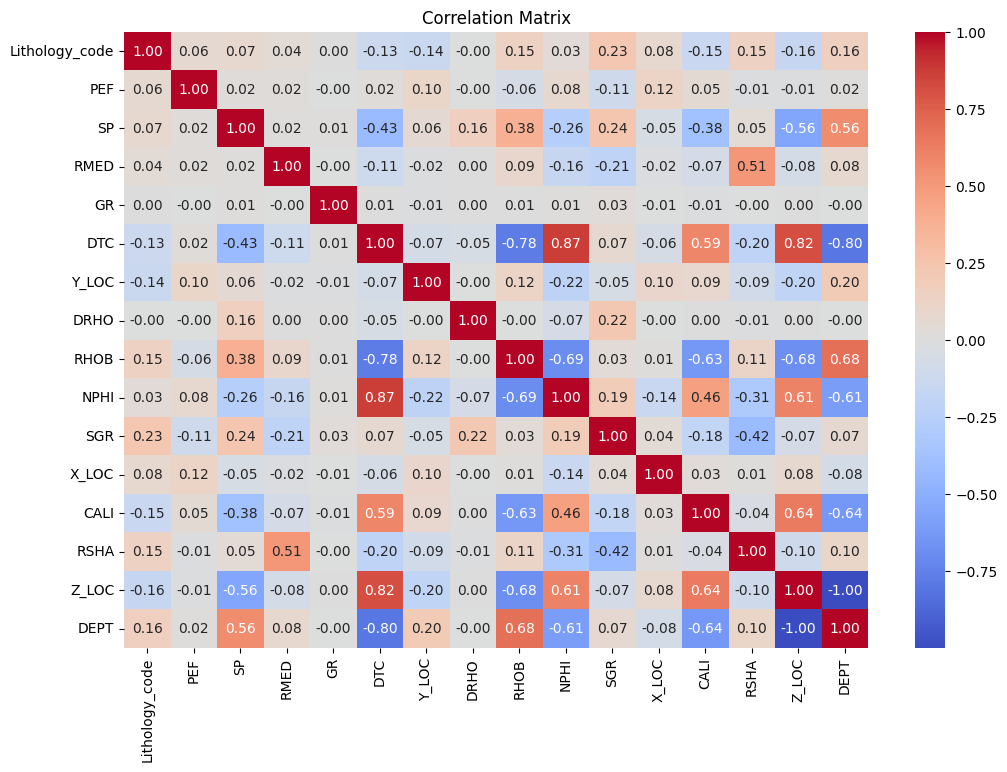

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


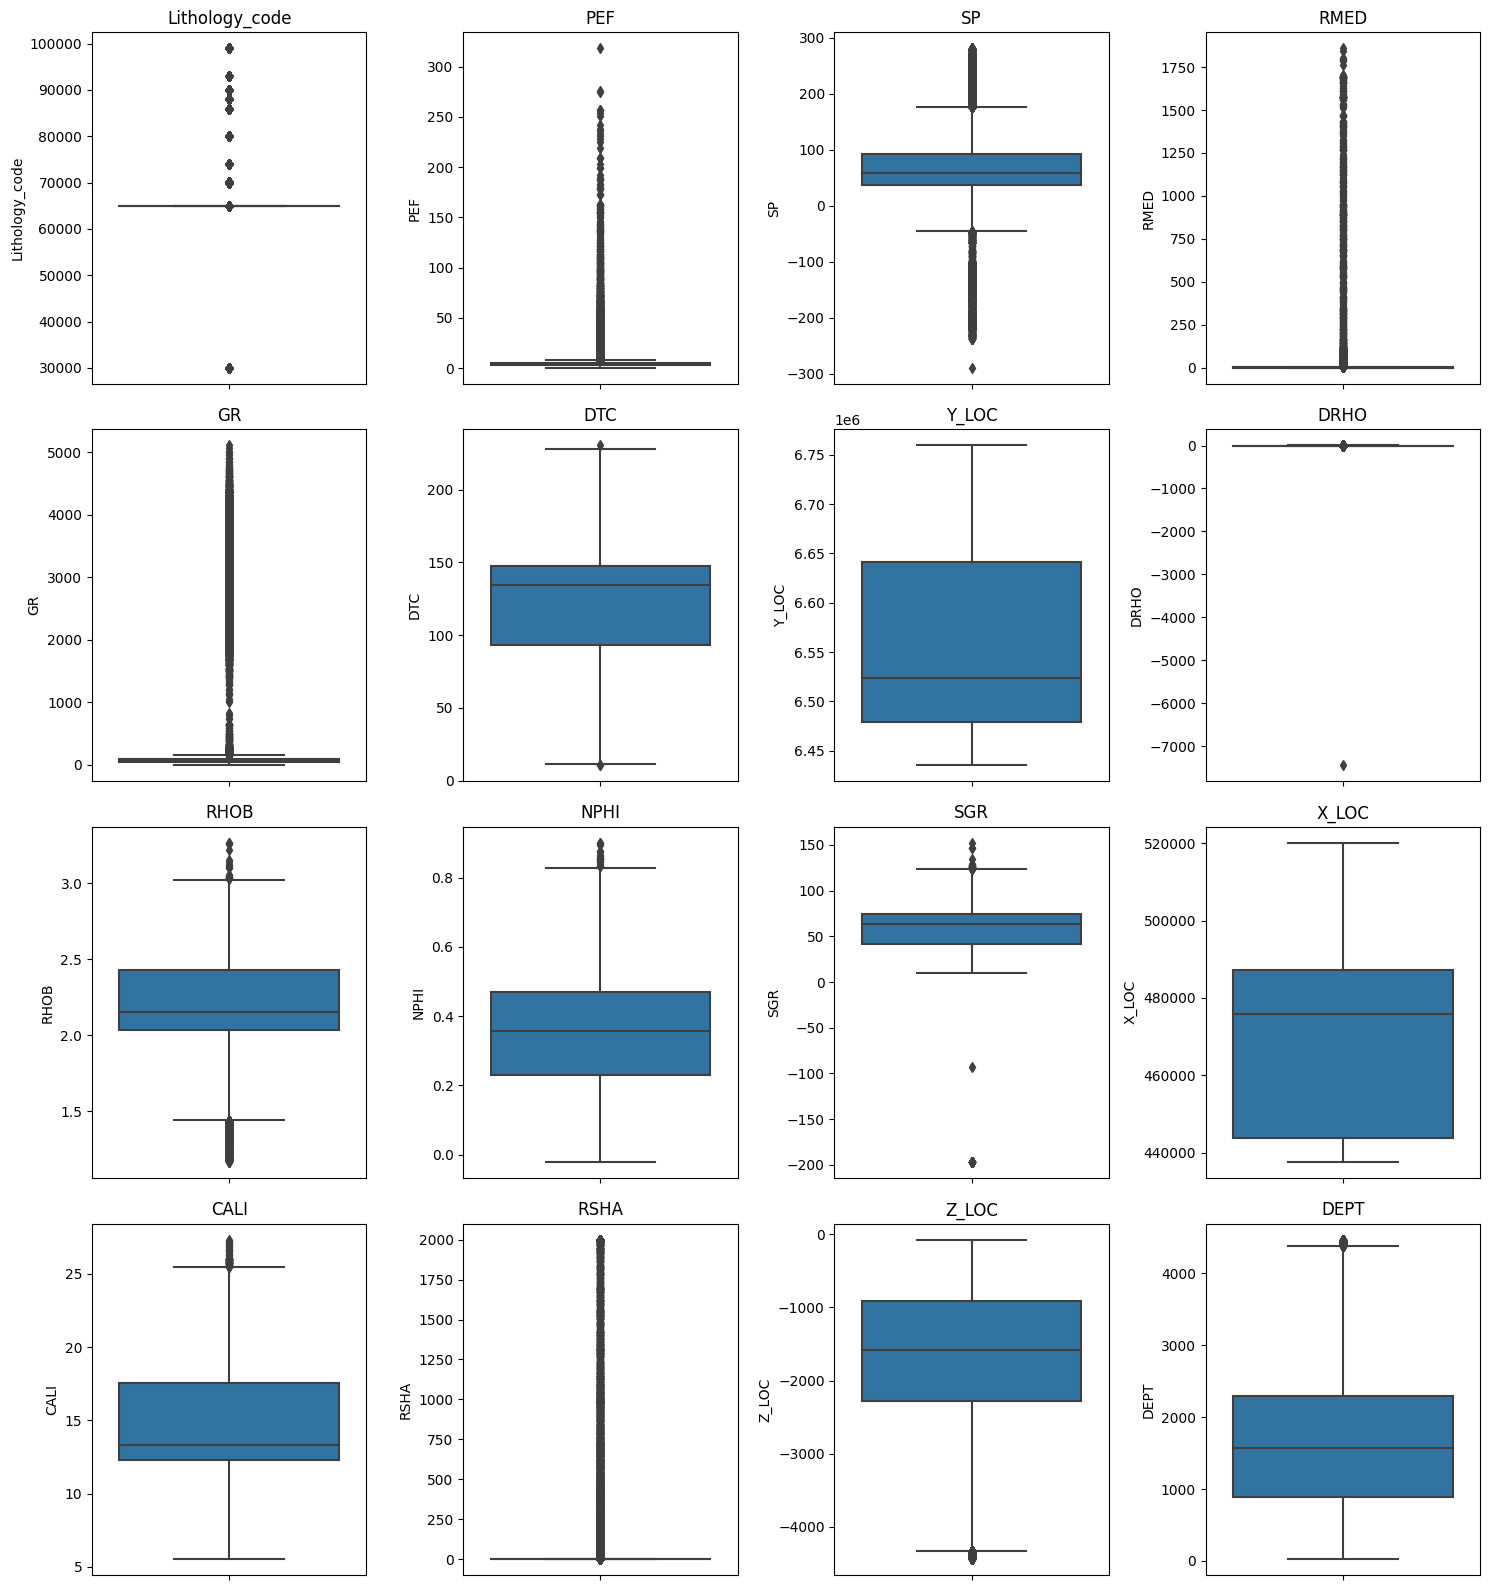

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pilih hanya fitur numerik
numeric_features = df_combined.select_dtypes(include=np.number).columns

# Tentukan ukuran grid subplot (misal: 4 kolom)
n_features = len(numeric_features)
n_cols = 4  # Banyaknya kolom dalam grid
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Hitung jumlah baris

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Buat subplots
axes = axes.flatten()  # Flatten array axes untuk iterasi mudah

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df_combined[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika jumlah fitur tidak pas dengan grid
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [24]:
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    return df

selected_features = [ "DRHO","GR","PEF"]

df_combined = handle_outliers(df_combined, selected_features)

### Predict Missing Value for Features (NPHI,RSHA,RHOB,Mud Weight,DRHO)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Feature yang akan diprediksi
features_to_predict = ["SP","RHOB", "DRHO", "RSHA", "NPHI","DTC","GR","SGR","PEF","CALI"]
feature_inputs = {
    "SP"  : ["DTC","DRHO","RHOB","NPHI",'Z_LOC','DEPT',"CALI"],
    "RHOB": ["SP", "DTC", "CALI", "NPHI", "DEPT","Z_LOC"],  
    "DRHO": ["SP", "DTC", "NPHI", "RSHA","DEPT"],   
    "RSHA": ["RMED", "DTC", "NPHI", "DEPT", "RHOB"],  
    "NPHI": ["SP", "DTC", "CALI", "RSHA", "Z_LOC", "RHOB","DEPT"],
    "DTC" : ["SP","RHOB","NPHI","CALI","Z_LOC","DEPT"],
    "GR"  : ["RHOB","NPHI","DTC","SP","CALI"],
    "SGR" : ["SP","RMED","DRHO","RSHA","NPHI","CALI"],
    "CALI" : ["SP","DTC","RHOB","NPHI","Z_LOC","DEPT"],
    # "RMED": ["RSHA", "NPHI", "DTC","RHOB","SP","SGR"] ,
    "PEF" :["SGR","RHOB","SP","DEPT","X_LOC","Y_LOC"],
}

df_filled = df_combined.copy()
df_test_filled = df_test.copy()

# Dictionary untuk menyimpan imputer agar bisa digunakan kembali
imputer_dict = {}

# Loop untuk memprediksi setiap fitur
for target_feature in features_to_predict:
    input_features = [feat for feat in feature_inputs[target_feature] if feat in df_filled.columns]

    # Pastikan ada fitur yang tersedia sebelum melanjutkan
    if not input_features:
        print(f"Skipping {target_feature}: No available input features")
        continue

    train_data = df_filled.dropna(subset=[target_feature])
    missing_data_train = df_filled[df_filled[target_feature].isna()]
    missing_data_test = df_test_filled[df_test_filled[target_feature].isna()]

    if train_data.empty:  # Jika tidak ada data training, skip fitur ini
        print(f"Skipping {target_feature}: No available training data")
        continue

    # Imputasi median untuk input features
    imputer = SimpleImputer(strategy="median")
    X_train = imputer.fit_transform(train_data[input_features])
    y_train = train_data[target_feature]

    # Simpan imputer untuk digunakan pada test set
    imputer_dict[target_feature] = imputer

    model = RandomForestRegressor(n_estimators=100, 
                                  max_depth=10, 
                                  random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Prediksi missing values di training dataset
    if not missing_data_train.empty:
        X_missing_train = imputer.transform(missing_data_train[input_features])
        y_pred_train = model.predict(X_missing_train)
        df_filled.loc[df_filled[target_feature].isna(), target_feature] = y_pred_train

    # Prediksi missing values di test dataset (gunakan model yang sudah dilatih)
    if not missing_data_test.empty:
        X_missing_test = imputer.transform(missing_data_test[input_features])
        y_pred_test = model.predict(X_missing_test)
        df_test_filled.loc[df_test_filled[target_feature].isna(), target_feature] = y_pred_test

df_combined = df_filled
df_test = df_test_filled


In [26]:
df_combined.isnull().sum()

file_name             0
Lithology_code    53881
PEF                   0
SP                    0
RMED              26576
GR                    0
DTC                   0
Y_LOC              7543
DRHO                  0
RHOB                  0
NPHI                  0
SGR                   0
X_LOC              7543
CALI                  0
RSHA                  0
Z_LOC              7543
DEPT                  0
dtype: int64

In [27]:
df_train_litho = df_combined.dropna(subset=["Lithology_code"])  # Data yang memiliki litologi
df_missing_litho = df_combined[df_combined["Lithology_code"].isna()]  # Data dengan NaN

selected_features = ["SP", "RHOB", "DRHO", "RSHA", "NPHI", "DTC", "GR", "SGR", "PEF", "CALI", "DEPT"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Imputasi nilai NaN di fitur
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(df_train_litho[selected_features])
y = df_train_litho["Lithology_code"]

# Split data untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model RandomForest untuk prediksi litologi
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluasi awal
print("Validation Accuracy:", rf.score(X_val, y_val))



Validation Accuracy: 0.9510782747603834


In [28]:
X_missing = imputer.transform(df_missing_litho[selected_features])
df_combined.loc[df_combined["Lithology_code"].isna(), "Lithology_code"] = rf.predict(X_missing)


In [29]:
df_combined.fillna(df_combined.median(), inplace=True)

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_11836\2291276814.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_combined.fillna(df_combined.median(), inplace=True)


In [30]:
df_test.fillna(df_test.median(), inplace=True)

In [31]:
df_combined = df_filled

In [32]:
df_combined.isnull().sum()

file_name         0
Lithology_code    0
PEF               0
SP                0
RMED              0
GR                0
DTC               0
Y_LOC             0
DRHO              0
RHOB              0
NPHI              0
SGR               0
X_LOC             0
CALI              0
RSHA              0
Z_LOC             0
DEPT              0
dtype: int64

Predict NaN lithology Code

## Modelling

In [96]:
X_test = df_test.drop(columns=['uuid'])

In [97]:
X_train = df_combined.drop(columns=['Lithology_code','file_name'])
y_train = df_combined['Lithology_code']

In [98]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [99]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [100]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [101]:
# Split data (80% train, 20% validation)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)


In [102]:
# Inisialisasi model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  
    Dropout(0.1),  
    Dense(256, activation='relu'),  
    Dropout(0.1),
    # Dense(256, activation='relu'),  
    # Dropout(0.1),
    Dense(len(le.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               4096      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 12)                3084      
                                                                 
Total params: 72972 (285.05 KB)
Trainable params: 72972 (285.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# Training model
history = model.fit(
    X_train_split, y_train_split,
    epochs=90, batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/90
1902/1902 [==============================] - 9s 4ms/step - loss: 0.5413 - accuracy: 0.8294 - val_loss: 0.4126 - val_accuracy: 0.8658
Epoch 2/90
1902/1902 [==============================] - 6s 3ms/step - loss: 0.4067 - accuracy: 0.8664 - val_loss: 0.3600 - val_accuracy: 0.8799
Epoch 3/90
1902/1902 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8779 - val_loss: 0.3339 - val_accuracy: 0.8874
Epoch 4/90
1902/1902 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8848 - val_loss: 0.3132 - val_accuracy: 0.8931
Epoch 5/90
1902/1902 [==============================] - 5s 3ms/step - loss: 0.3256 - accuracy: 0.8894 - val_loss: 0.3008 - val_accuracy: 0.8983
Epoch 6/90
1902/1902 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8930 - val_loss: 0.2920 - val_accuracy: 0.9010
Epoch 7/90
1902/1902 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.8947 - val_loss: 0.2787 - val_accuracy:

In [104]:
y_nn_pred = np.argmax(model.predict(X_test_scaled), axis=1)
y_nn_pred_original = le.inverse_transform(y_nn_pred)

print("Prediksi unik NN:", set(y_nn_pred_original))

3807/3807 [==============================] - 3s 781us/step
Prediksi unik NN: {80000.0, 88000.0, 65030.0, 65000.0, 93000.0, 30000.0, 70000.0, 70032.0, 86000.0, 74000.0, 90000.0, 99000.0}


In [105]:
y_nn_pred_original

array([65000., 65000., 65000., ..., 65000., 65000., 65000.])

In [106]:
lithology_mapping = {
30000:'Sandstone',
65030:'Sandstone/Shale',
65000:'Shale',
80000:'Marl',
74000:'Dolomite',
70000:'Limestone',
70032:'Chalk',
88000:'Halite',
86000:'Anhydrite',
99000:'Tuff',
90000:'Coal',
93000:'Basement',
}

In [107]:
# Mengubah array menjadi DataFrame
df_predictions = pd.DataFrame({'uuid': df_test['uuid'], 'label_name': y_nn_pred_original})

# Pastikan label_name dalam bentuk integer sebelum mapping
df_predictions['label_name'] = df_predictions['label_name'].astype(int)

# Mengonversi nilai numerik ke label litologi
df_predictions['label_name'] = df_predictions['label_name'].map(lithology_mapping)

# Simpan ke file CSV sesuai format submission
df_predictions.to_csv("ANN_1.csv", index=False)

# Menampilkan beberapa hasil untuk verifikasi
df_predictions

,uuid,label_name
0,14812,Shale
1,72908,Shale
2,103104,Shale
3,23480,Shale
4,104267,Shale
...,...,...
121792,10928,Shale
121793,26727,Shale
121794,83995,Shale
121795,67375,Shale


In [108]:
df_predictions['label_name'].unique()


array(['Shale', 'Sandstone', 'Limestone', 'Tuff', 'Sandstone/Shale',
       'Chalk', 'Marl', 'Anhydrite', 'Basement', 'Dolomite', 'Halite',
       'Coal'], dtype=object)

In [109]:
from sklearn.metrics import classification_report

y_pred_val = model.predict(X_val)
y_pred_val_classes = np.argmax(y_pred_val, axis=1)

print(classification_report(y_val, y_pred_val_classes))


1902/1902 [==============================] - 2s 833us/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11913
           1       0.95      0.97      0.96     34666
           2       0.85      0.77      0.81      5710
           3       0.91      0.86      0.88      3585
           4       0.91      0.98      0.94      1125
           5       0.69      0.56      0.62       233
           6       0.87      0.87      0.87      1645
           7       0.91      0.93      0.92       183
           8       0.98      0.99      0.98       786
           9       0.80      0.74      0.77       210
          10       0.95      0.97      0.96        37
          11       0.85      0.90      0.87       764

    accuracy                           0.93     60857
   macro avg       0.88      0.87      0.88     60857
weighted avg       0.93      0.93      0.93     60857



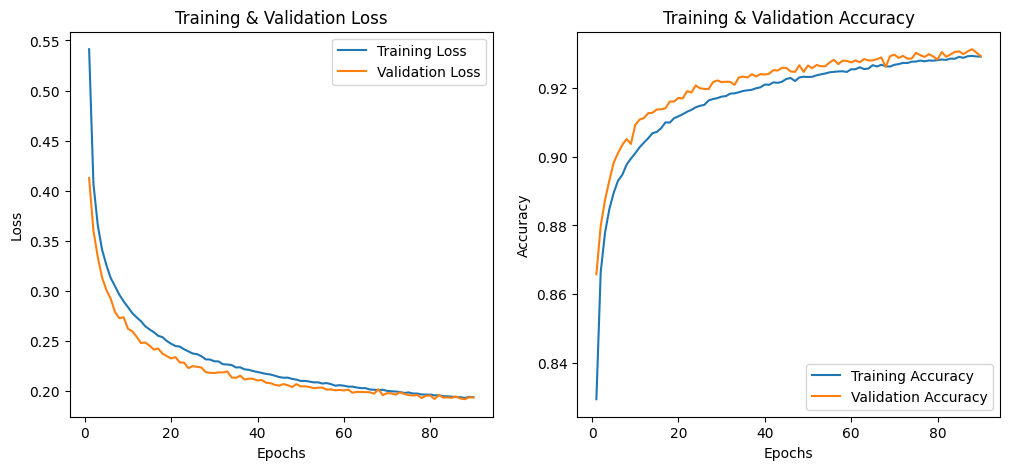

In [110]:
import matplotlib.pyplot as plt

# Ambil nilai loss dan accuracy dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history.get('accuracy', history.history.get('acc'))  # Bisa 'accuracy' atau 'acc'
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(train_loss) + 1)  # Buat daftar epoch

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', )
plt.plot(epochs, val_loss, label='Validation Loss', )
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy', )
plt.plot(epochs, val_acc, label='Validation Accuracy', )
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


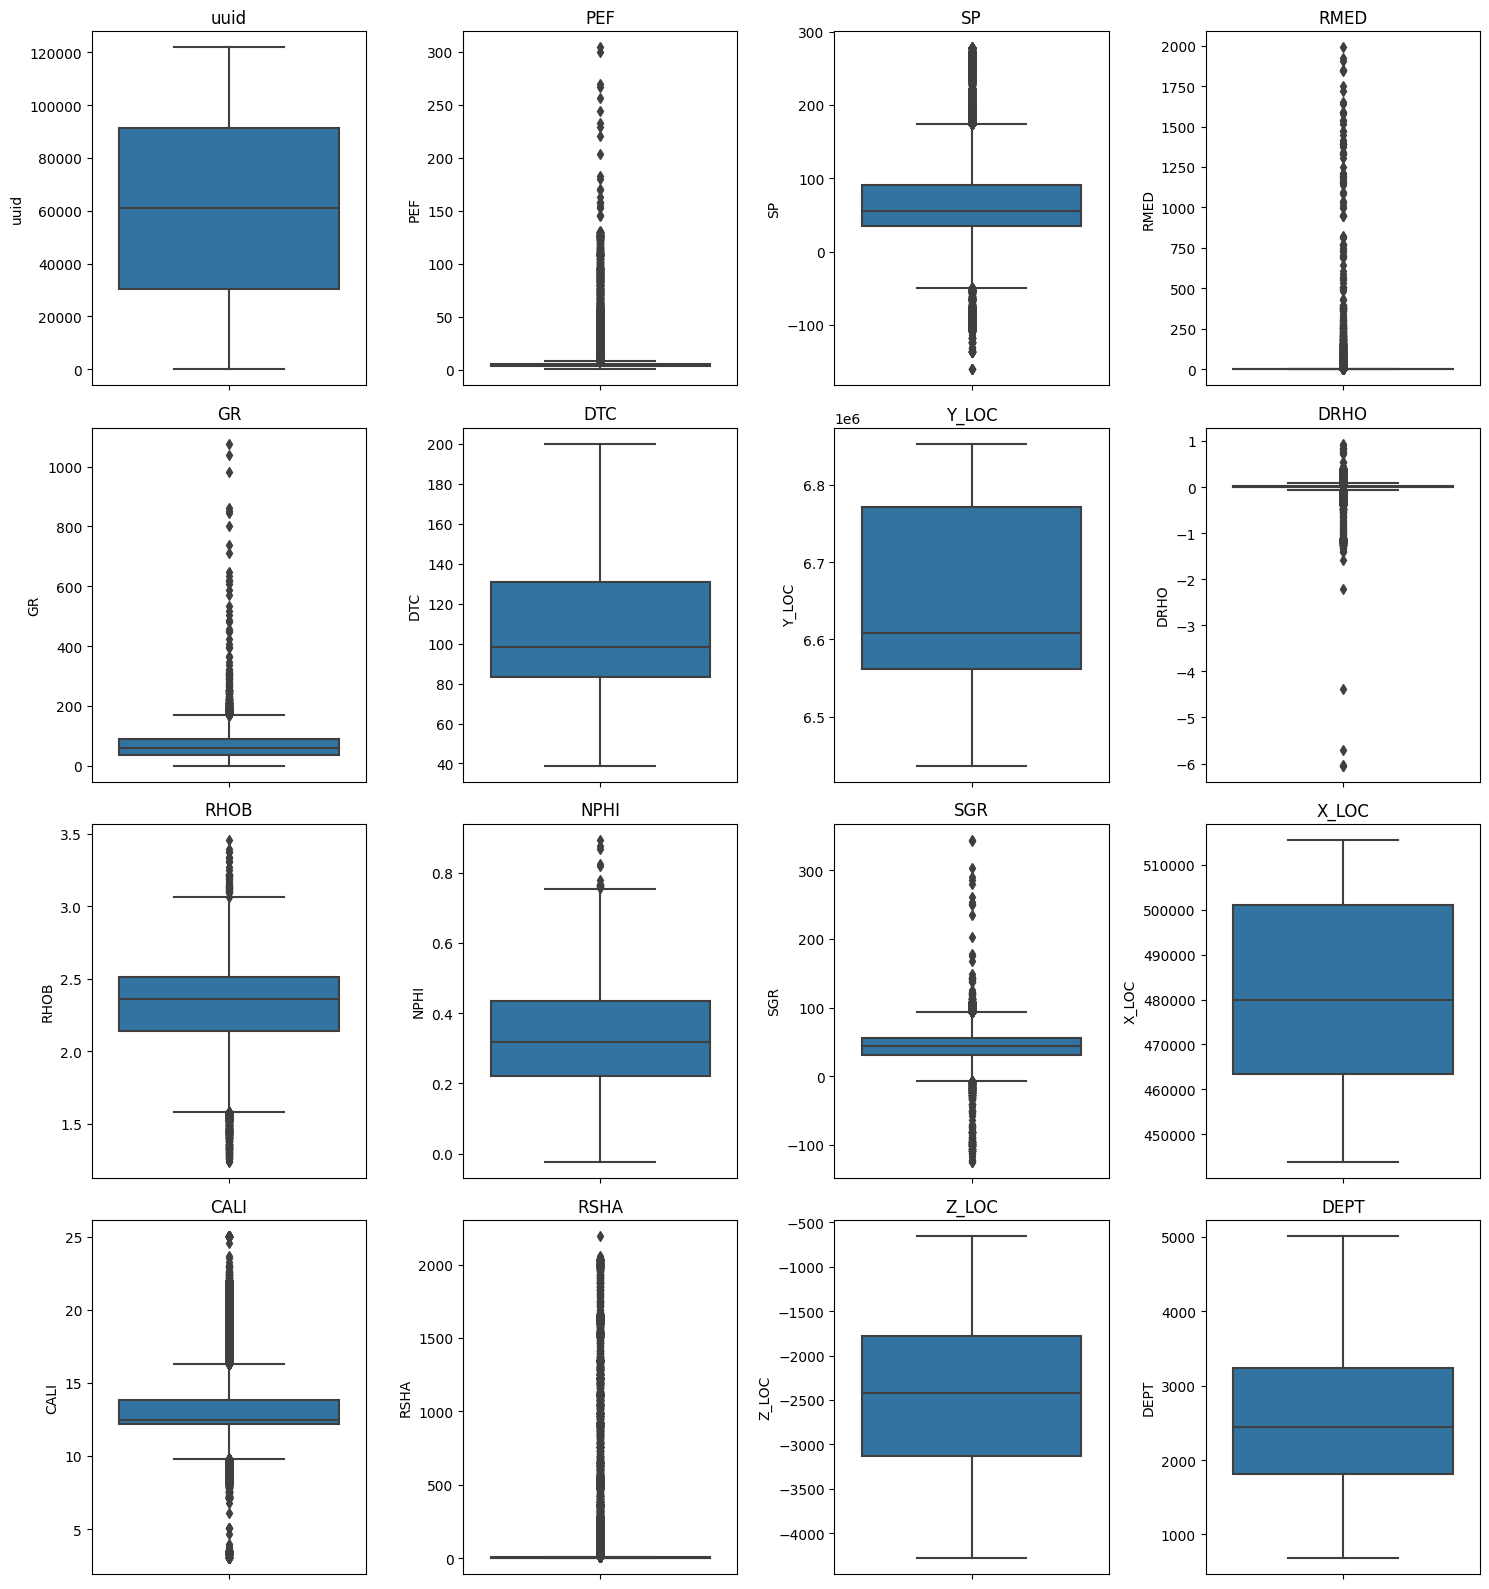

In [111]:
# Pilih hanya fitur numerik
numeric_features = df_test.select_dtypes(include=np.number).columns

# Tentukan ukuran grid subplot (misal: 4 kolom)
n_features = len(numeric_features)
n_cols = 4  # Banyaknya kolom dalam grid
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Hitung jumlah baris

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Buat subplots
axes = axes.flatten()  # Flatten array axes untuk iterasi mudah

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df_test[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika jumlah fitur tidak pas dengan grid
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

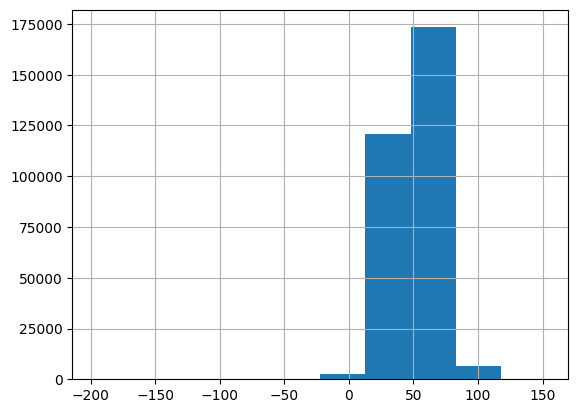

In [112]:
df_combined["SGR"].hist()

<Axes: >

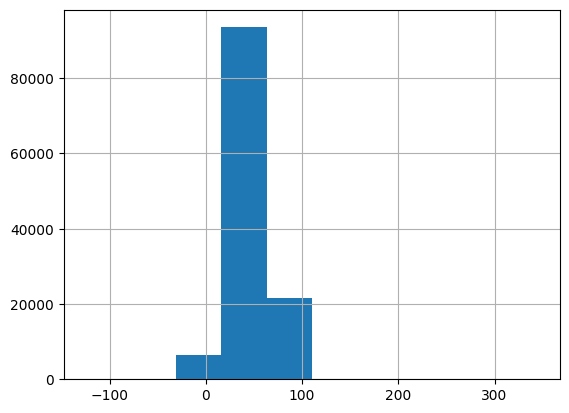

In [113]:
df_test["SGR"].hist()